<span style="font-size:x-large;">Lab 4: Mini-Assignment</span>

# Census Lab Assignment

## Task

Investigate a question of your choosing about a population from the 2016 Census data provided by the Australian Bureau of Statistics (ABS), and present your findings, as discussed in the accompanying assignment sheet.

---

## 2016 Australian Census - Industry of Employment: Australia as a whole

Looking at the quickstats of Industry of employment of the 2016 Australian Census, the top responses are showed below:

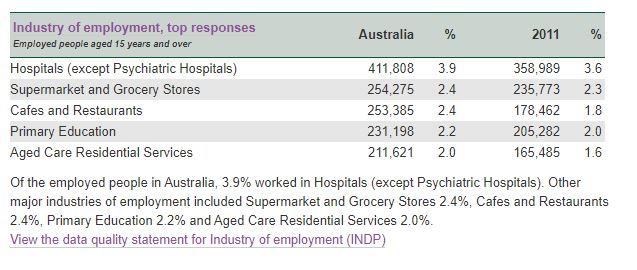

"Of the employed people in Australia, 3.9% worked in Hospitals (except Psychiatric Hospitals). Other major industries of employment included Supermarket and Grocery Stores 2.4%, Cafes and Restaurants 2.4%, Primary Education 2.2% and Aged Care Residential Services 2.0%." - abs.gov.au Source: (https://quickstats.censusdata.abs.gov.au/census_services/getproduct/census/2016/quickstat/036?opendocument)


Information about this variable: https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/2900.0main+features100602016

However, digging deeper into the information of how the Industry of Employment (INDP) was created, they used the general categories instead of the more specific categories like the information above. What would be the reason for this? Below is a snapshot of the dictionary section of the census, listing the categories of industry:

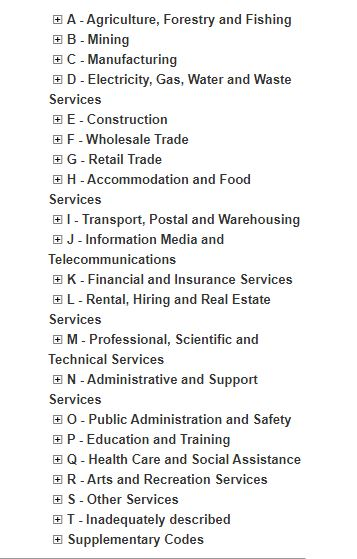

Source: https://www.abs.gov.au/ausstats/abs@.nsf/Lookup/2901.0Chapter5802016

## Which industries do the top 5 belong to?

Expanding the categories, here is the list of the top 5 responses according to their general industry:

1. Hospitals (except Psychiatric Hospitals) - Q. Health Care and Social Assistance

2. Supermarket and Grocery Stores - G. Retail Trade

3. Cafes and Restaurants - H. Accommodation and Food Services

4. Primary Education - P. Education and Training

5. Aged Care Residential Services - Q. Health Care and Social Assistance


Looking at the above, number 1 & 5 belongs to the same industry. What I have decided to do is look into the actual data called "Industry of Employment by Age by Sex". I downloaded this from the 2016 Census General Community Profile datapack from the ABS. source: https://quickstats.censusdata.abs.gov.au/census_services/getproduct/census/2016/communityprofile/036?opendocument

## The main question

What I want to see is if the top 5 of the actual data from the datapack compares to the top 5 that was shown in the quickstats section of the Census. I want to find out if using the specific industry instead of the general industry was justified.

From the Metadata, the table that I need is G51 - Industry of Employment by Age by Sex. The table population is from employed persons aged 15 years and over. Since I only want to look at the population as a whole, I don't need all the csv files from this table. There are 4 csv files (G51A, G51B, G51C and G51D) with the first 2 showing the spread of the male and female population across industries (the rest of the female population extends to the first few lines of G51C) I only require the TOTAL persons data so only the rest of G51C and the whole of G51D is what I used for this analysis.


## Cleaning the data

I created some functions to clean the data from its raw form into one that I can use to visualise and properly analyse and interpret the data. Since I only need the total persons for each industry, I need to remove the data for the spread of ages across each industry and just keep the total for each one.

In [1]:
def headers_numbers(content):
    headers = content.splitlines()[0].split(',')                    #splits each file into headers and the numbers.
    numbers = content.splitlines()[1].split(',')

    return headers, numbers

def wantedFromG51C(headings, numbers):
    return headings[21:], numbers[21:]
                                                                    #removes first unwanted data (rest of the female data and total for each age group of all category).
def wantedFromG51D(headings, numbers):
    return headings[1:-10], numbers[1:-10]

def combine_data(headingsA, headingsB, numbersA, numbersB):
    headings = headingsA + headingsB
    numbers = numbersA + numbersB                                   #combines all headings and list of numbers from each file together.

    return headings, numbers

def total_industry(headings, numbers):
    wanted = slice(9,len(headings)+1,10)
    industries = []
    for cat in headings[wanted]:                                    #removes the rest of the unwanted data (total for each age group of each category).
        industries.append(cat[2:-4])
    population = []
    for pop in numbers[wanted]:
        population.append(int(pop))

    return industries, population

In [2]:
def clean_industry_data():
    DATA_DIR = '2016_GCP_AU_for_AUS_short-header/2016 Census GCP Australia for AUST/'
    INDUSTRY_C = '2016Census_G51C_AUS.csv'
    INDUSTRY_D = '2016Census_G51D_AUS.csv'

    with open(DATA_DIR+INDUSTRY_C, 'r') as fileC:                         #reads the csv files that are required
        contentsC = fileC.read()
    with open(DATA_DIR+INDUSTRY_D, 'r') as fileD:
        contentsD = fileD.read()

    C_headers, C_numbers = headers_numbers(contentsC)
    D_headers, D_numbers = headers_numbers(contentsD)
    p_headingsC, p_numbersC = wantedFromG51C(C_headers, C_numbers)        #calls the functions that are required to clean the data
    p_headingsD, p_numbersD = wantedFromG51D(D_headers, D_numbers)
    person_headings, person_numbers = combine_data(p_headingsC, p_headingsD, p_numbersC, p_numbersD)

    return total_industry(person_headings, person_numbers)  #returns the total number of people in each category

In [3]:
def vis_industry_data(cleaned_industry_data):
    import matplotlib.pyplot as plt

    plt.figure(figsize =(15, 7))
    plt.bar(cleaned_industry_data[0], cleaned_industry_data[1])
    plt.grid(axis = 'both', which='both', alpha=0.6)
    plt.tick_params(axis = 'x', labelrotation = 90)
    plt.xlabel("Industries")
    plt.ylabel("Number of People (in millions)")
    plt.title("Industry of Employment by Population")
    plt.savefig("Industry by Employment by Population.png", bbox_inches = 'tight')
    plt.show()

## My findings

The chart below shows a bar chart of each industry along with the number of people that was recorded that is employed in a particular industry.

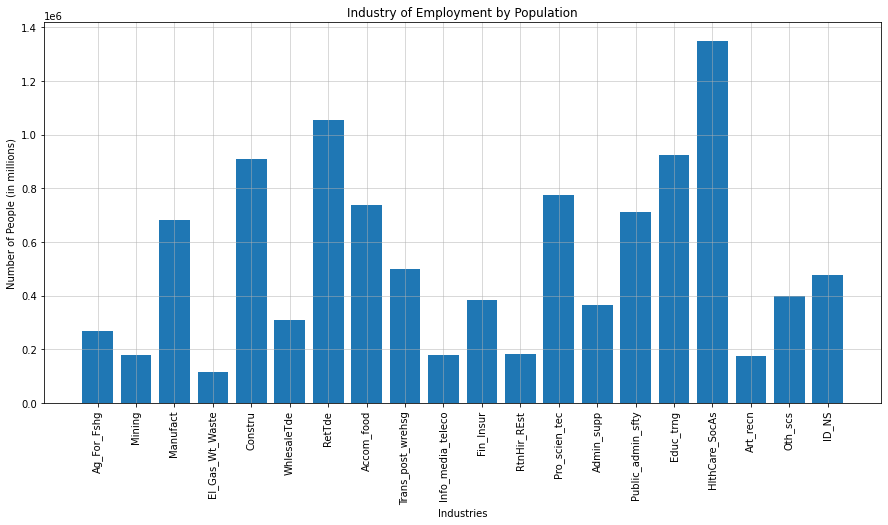

Looking at the chart, it does seem that Healthcare and Social Assistance has got the most response. The second top one looks like it is Retail Trade. As a refresh, below is the list of the categories in the same order as the chart above with their full name:

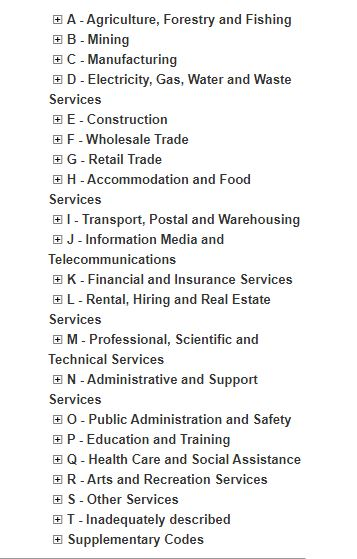

## An easier way to look at the chart

I decided to order the industries from descending order so I can properly look at which ones are at the top 5. I can then compare this from the top 5 that was shown on the quickstats section of the Census portal on the ABS website. Reminder that the one shown on quickstats are specific industries rather than their general category (Supermarket and Grocery Stores belongs to Retail Trade).

To achieve this I created another function (below) that sorts the list by using the zip function and ordering it by the numbers in descending order.

In [4]:
def sort_industry_data(industries, population):
    pairs = list(zip(industries, population))
    pairs.sort(key=lambda x:x[1], reverse = True)

    sorted_industries = []
    sorted_population = []
    for i in range(len(population)):
        sorted_industries.append(pairs[i][0])
        sorted_population.append(pairs[i][1])

    return sorted_industries, sorted_population

## What does it tell us?

Here is the chart again but the industries are sorted by the total persons per industry in descending order:

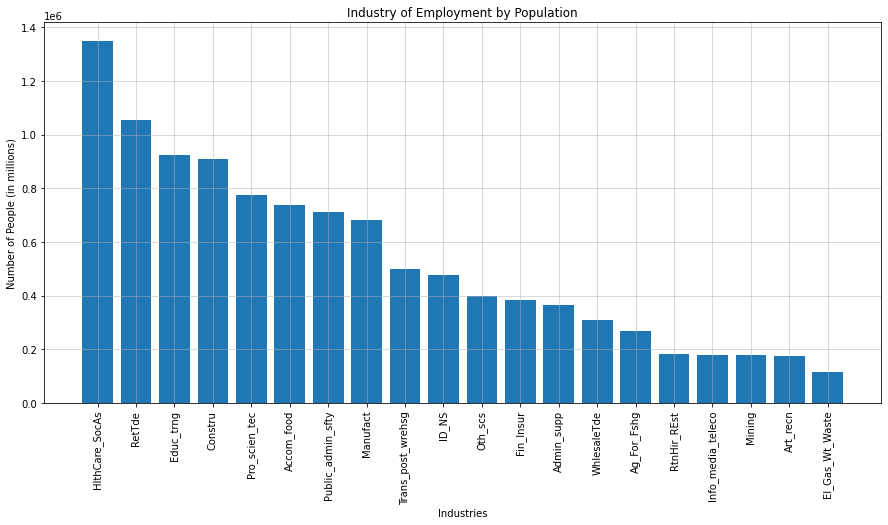




From the chart above, the top 5 industries are:

1. Health Care and Social Assistance
2. Retail Trade
3. Education and Training
4. Construction
5. Professional, Scientific and Technical Services

Compared to the one on the quickstats portal:

1. Hospitals (except Psychiatric Hospitals) - Q. Health Care and Social Assistance
2. Supermarket and Grocery Stores - G. Retail Trade
3. Cafes and Restaurants - H. Accommodation and Food Services
4. Primary Education - P. Education and Training
5. Aged Care Residential Services - Q. Health Care and Social Assistance

## Conclusion

Comparing the top 5 responses from quickstats and the top 5 from the data, once the quickstats have been placed in their respective general industries, only the first 2 were similar. Number 3 in quickstats for example, belongs in the 6th top industry from the data. What statement were they trying to make by releasing the top industries based on the specific category? Plus, from the quickstats top 5, number 5 belongs in the same category as number 1. What is odd about the quickstats data as well is that I couldn't find the data that breaks down the general industries so I can check this properly. It would have been better to show the top 5 responses based on the general industries. Notice as well that the data I used includes "Other Services" and "Inadequately Described" which for me, opens the possibility that the numbers in these 2 categories MAY actually belong into the rest of the categories.

Based on "top responses", there are clearly more responses from people that filled out the Census, where the industries were they are employed in are (in order), Health Care and Social Assistance, Retail Trade, Education and Training, Construction, and Professional, Scientific and Technical Services. To conclude, the only justification that I can think off is that showing the quickstats version is to avoid the instance of ambiguity, but it excludes a part of the population that people working in the professional, scientific and technical services industry are among the 5th in Australia bases on the 2016 Census.

### Declaration

This declaration should be completed and remain attached to the bottom of your submission.

*I am aware of the University’s [policy on academic conduct](https://www.governance.uwa.edu.au/procedures/policies/policies-and-procedures?method=document&id=UP07/21) and I declare that this assignment is my own work entirely and that suitable acknowledgement has been made for any sources of information used in preparing it. I have retained a hard copy for my own records.*

Name: Jhune Francis Aguiba

Date: 06/09/2020

---